# SVM USING TENSORFLOW

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import tensorflow as tf
tf.set_random_seed(42)
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris.data,iris.target],columns=np.r_[iris.feature_names,['target']])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [34]:
df.target.value_counts()

-1.0    100
 1.0     50
Name: target, dtype: int64

In [35]:
for i in df.index.values:
    if df.loc[i,'target']==0.0:
        df.loc[i,'species']= 'setosa'
    elif df.loc[i,'target']==1.0:
        df.loc[i,'species']= 'versicolor'
    else:
        df.loc[i,'species']= 'virginica'

In [36]:
for i in df.index.values:
    if df.loc[i,'target']==0.0:
        df.loc[i,'target']= 1
    else:
         df.loc[i,'target']= -1


In [37]:
import seaborn as sns

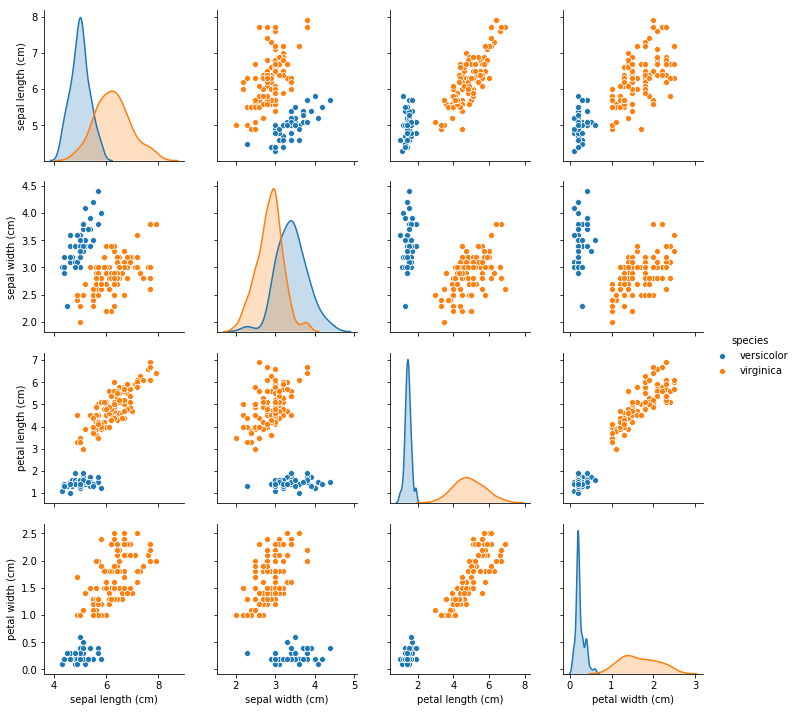

In [38]:
sns.pairplot(df.drop( columns='target'),hue='species')

### tensorflow part

In [78]:
X = df.iloc[:,:-2]
y = df.iloc[:,-2:-1]
# X

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)


In [80]:
inputs,outputs = X.shape[1],y.shape[1]
x_tensor = tf.placeholder(dtype=tf.float32,shape=[None,inputs],name='xtensor')
y_tensor = tf.placeholder(dtype=tf.float32,shape=[None,outputs],name='ytensor')

w = tf.Variable(tf.random_normal([inputs,outputs]),dtype=tf.float32,name='w')
b = tf.Variable(tf.random_normal([outputs]),dtype=tf.float32,name='b')

In [81]:
# model 
model = tf.add(tf.matmul(x_tensor,w),b)


In [82]:
loss = tf.reduce_mean(tf.square(tf.subtract(model,y_tensor)))
l2 = 0.1 * tf.reduce_sum(tf.square(w))

hinge = tf.reduce_mean(tf.maximum(0.,1.-tf.multiply(model,y_tensor))) + l2

# l2_norm = tf.reduce_sum(tf.square(w))
# alpha = tf.constant([0.1])
# classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1.,tf.multiply(model_output, y_tensor))))
# loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

prediction = tf.sign(model)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_tensor),tf.float32))

In [83]:
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(hinge)
# train_step= tf.train.GradientDescentOptimizer(0.01).minimize(loss)


In [84]:
# train
loss_epoch,w_hat,b_hat,v=[],0,0,[]
train_accuracy,test_accuracy=[],[]
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for i in range(500):
        tfs.run(optimizer,feed_dict={x_tensor:X_train,y_tensor:y_train})
        lsv = tfs.run(hinge,feed_dict={x_tensor:X_train,y_tensor:y_train})
        loss_epoch.append(lsv)
        
        train_acc_temp = tfs.run(accuracy, feed_dict={x_tensor:X_train,y_tensor:y_train})
        train_accuracy.append(train_acc_temp)
        test_acc_temp = tfs.run(accuracy, feed_dict={x_tensor:X_test,y_tensor:y_test})
        test_accuracy.append(test_acc_temp)

    w_hat,b_hat = tfs.run([w,b])

In [85]:
print("After 500 epoch,  Training_ accuracy={:.8f}".format(train_accuracy[-1]))
print("After 500 epoch,  Testing_accuracy={:.8f}".format(test_accuracy[-1]))
print("The equation has form: b + w1*x1 + w2*x2 = 0")
print("The equation is: {}  + {}*x1 + {}*x2 = 0".format(b_hat.ravel(),w_hat[0].ravel(),w_hat[1].ravel()))

After 500 epoch,  Training_ accuracy=1.00000000
After 500 epoch,  Testing_accuracy=1.00000000
The equation has form: b + w1*x1 + w2*x2 = 0
The equation is: [1.4141358]  + [-0.44614798]*x1 + [-0.03772115]*x2 = 0


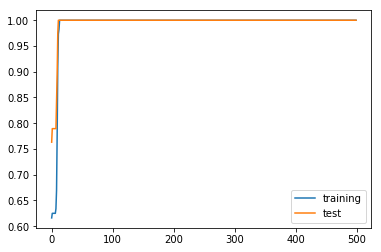

In [86]:
import matplotlib.pyplot as plt
plt.plot(train_accuracy,label='training')
plt.plot(test_accuracy,label='test')
plt.legend()
plt.show()

